## Emergent property of ensembles - uncovering different structure types than parent algorithm (Kmeans, Majority Vote, half moons)

In [22]:
# Reproduce Ana Fred's Majority voting solution to stabilizing KMeans clustering using OpenEnsembles
# This example demonstrates how an ensemble of kmeans solutions, which are constrained to finding spheroids
# can identify contigous structres
import pandas as pd 
import random
import matplotlib.pyplot as plt
from sklearn import datasets
import openensembles as oe


X, y = datasets.make_moons(n_samples=200, shuffle=True, noise=0.02, random_state=None)
df = pd.DataFrame(X)
dataObj = oe.data(df, [1,2])
#dataObj.plot_data('parent')



### Example of using OpenEnsembles to create and visualize a single solution

/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


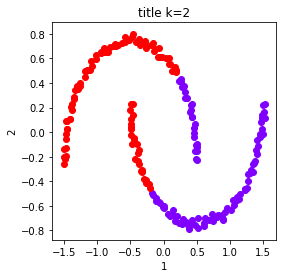

In [34]:
#Plot a single solution 
# default Scikit-learn settings have built in some determinism using Ana Fred's principals, so we have to override those

c = oe.cluster(dataObj) 
K = 2
name = 'kmeans'
c.cluster('parent', 'kmeans', name, K, init = 'random', n_init = 1)
fig = dataObj.plot_data('parent', class_labels=c.labels['kmeans'])
plt.title('title k=2')
fig.set_size_inches(4,4)
fig.savefig('kmeans_keq2.eps', bbox_inches="tight")

### Create an ensemble of kmeans, plot convergence towards solution

In [62]:
# Build towards a majority voting that finds the two continuous partitions
c = oe.cluster(dataObj) 
c_MV_arr = []
val_arr = []
k_values = []
numValues = 40
for i in range(0,numValues-1):
    name = 'kmeans_' + str(i)
    c.cluster('parent', 'kmeans', name, K=16, init = 'random', n_init = 1)
    c_MV_arr.append(c.finish_majority_vote(threshold=0.5)) 
        
    v = oe.validation(dataObj, c_MV_arr[i])
    #validation_name = 'point_biserial'
    validation_name = 'det_ratio'
    val_name = v.calculate(validation_name, 'majority_vote', 'parent')
    val_arr.append(v.validation[val_name])
    
    k_values.append(len(c_MV_arr[i].clusterNumbers['majority_vote']))
        

/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


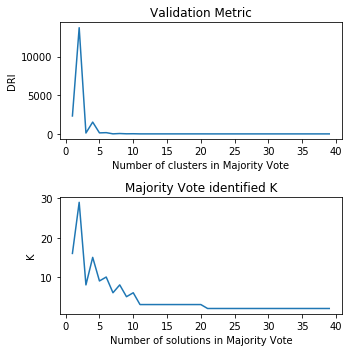

In [93]:


#Connectedness 
fig = plt.figure(5, figsize=(5,5))
plt.subplot(2,1,1)
plt.plot(range(1,numValues), val_arr)
plt.title('Validation Metric')
plt.xlabel('Number of clusters in Majority Vote')
plt.ylabel('DRI')
#plt.show()


#K
plt.subplot(2,1,2)
plt.plot(range(1,numValues), k_values)
plt.title('Majority Vote identified K')
plt.xlabel('Number of solutions in Majority Vote')
plt.ylabel('K')
plt.tight_layout()
plt.show()
fig.savefig('validation_k.eps', bbox_inches="tight")

/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


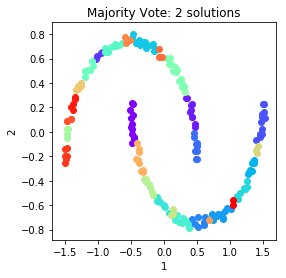

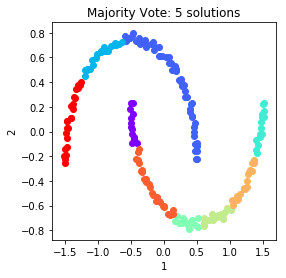

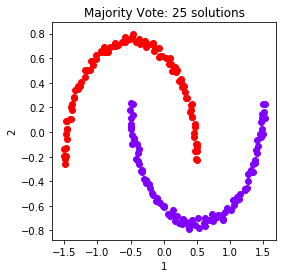

In [67]:
# Plot some span of solutoins, including the one that minimizes connectedness 
import operator
idx, value = min(enumerate(val_arr), key=operator.itemgetter(1)) #Where the connectedness metric minimized

toPlot = [1, 4, 24]
for ind in toPlot:

    fig = dataObj.plot_data('parent', class_labels=c_MV_arr[ind].labels['majority_vote'])
    fig.set_size_inches(4,4)
    plt.title('Majority Vote: %d solutions'%(ind+1))
    plt.show()
    fig.savefig('majority_vote'+str(ind)+'.eps', bbox_inches="tight")



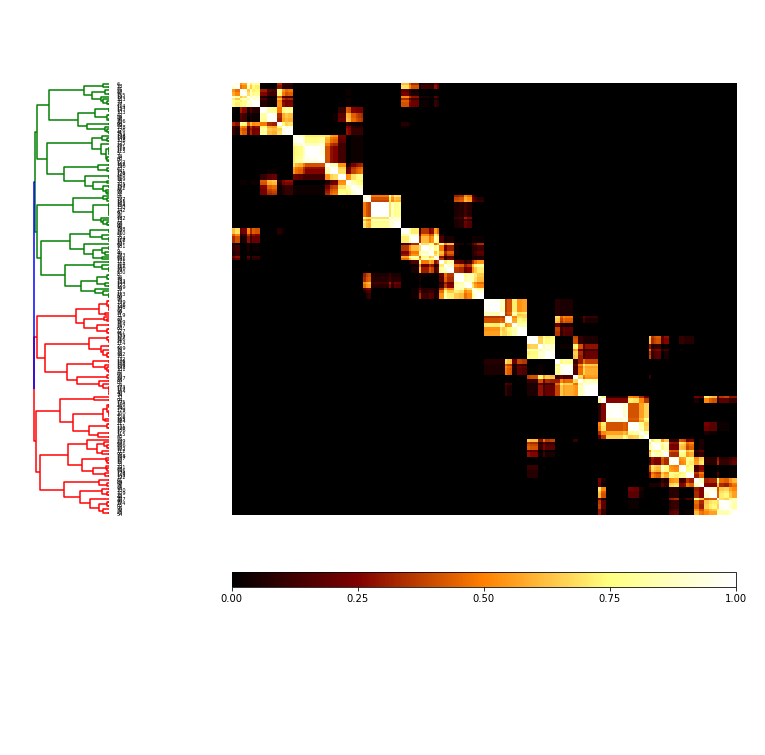

In [71]:
coMat = c.co_occurrence_matrix()
fig = coMat.plot(threshold=1, linkage='average', labels=False)
fig.savefig('cooccurrence.eps')

In [44]:
c.clusterNumbers

{'kmeans_0': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 'kmeans_1': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 'kmeans_10': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 'kmeans_11': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 'kmeans_12': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 'kmeans_13': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 'kmeans_14': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 'kmeans_15': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 'kmeans_16': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 'kmeans_17': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 'kmeans_18': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 'kmeans_2': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int